<a href="https://colab.research.google.com/github/robinhester/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
numbers=[3505,2400,3027,2798,3700,3250,2689]

In [0]:
def var_std(x):
  summ = 0
  for i in x:
    summ += i
  length = 0
  for n in x:
    length += 1
  mean = summ / length
  numerator = 0
  for i in x:
    numerator += (i - mean)**2
  var = numerator / (length - 1)
  std = var**0.5
  print(f'Mean: {mean}, Sample Variance: {var}, Sample Stardard Deviation: {std}')

In [3]:
var_std(numbers)

Mean: 3052.714285714286, Sample Variance: 214387.90476190473, Sample Stardard Deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd 

In [0]:
import numpy as np

In [0]:
customers=[127,80,105,92,120,115,93]

In [0]:
fake_data = {"Numbers": numbers, "Customers": customers,}

df = pd.DataFrame(fake_data)

In [8]:
df.cov()

,Numbers,Customers
Numbers,214387.904762,7604.357143
Customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [9]:
var_std(customers)

Mean: 104.57142857142857, Sample Variance: 290.95238095238096, Sample Stardard Deviation: 17.057326313123664


In [10]:
cus_std=np.std(df.Customers, ddof=1)
cus_std

17.057326313123664

In [11]:
var_std(numbers)

Mean: 3052.714285714286, Sample Variance: 214387.90476190473, Sample Stardard Deviation: 463.0204150595357


In [12]:
num_std=np.std(df.Numbers, ddof=1)
num_std

463.0204150595357

In [13]:
denominator=np.std(df.Numbers, ddof=1)*np.std(df.Customers, ddof=1)
denominator

7897.890309308459

In [14]:
7604.357143/denominator

0.962833977832979

In [0]:
def corellation(x,y):
  a=np.std(x, ddof=1)
  b=np.std(y, ddof=1)
  den=a*b
  num=np.cov(x,y)
  return num/den

In [16]:
corellation(numbers, customers)

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [17]:
df.corr()

,Numbers,Customers
Numbers,1.000000,0.962834
Customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [19]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [20]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [21]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [22]:
titanic.var(ddof=1)

Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

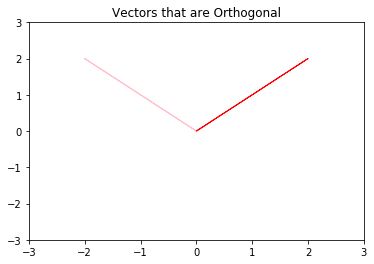

In [23]:
#synonym for perpendicular
#dot product of the transpose, the answer for an orthogonality will always be an idenity matrix
import matplotlib.pyplot as plt 
vectors1=([-2,2])
vectors2=([2,2])

plt.arrow(0,0,vectors1[0], vectors1[1], color='Pink')
plt.arrow(0,0,vectors2[0],vectors2[1], color='Red')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('Vectors that are Orthogonal')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [24]:
vectors_a=[-5,
           3,
           7]
vectors_b=[6,
           -8,
           2]
vec={'a': vectors_a , 'b':vectors_b}
vectors=pd.DataFrame(vec)
vectors

,a,b
0,-5,6
1,3,-8
2,7,2


In [25]:
import math

vectors_t=vectors.T
vectors_t

,0,1,2
a,-5,3,7
b,6,-8,2


In [26]:
#not orthagonical 
np.dot(vectors,vectors_t)

array([[ 61, -63, -23],
       [-63,  73,   5],
       [-23,   5,  53]])

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [27]:
#find the norm of c, then square it 
c=np.array([2,-15,6,20])
c_norm_squared=(np.linalg.norm(c))**2
print(f'The norm of c squared is {c_norm_squared}')

The norm of c squared is 665.0


In [28]:
dot_prod_c=np.dot(c,c)
print(f'The dot product of C by C is {dot_prod_c}')

The dot product of C by C is 665


In [29]:
c_t_c=(c.T*c)
print(f'The multiplication of C Transverse and C is {c_t_c}')

The multiplication of C Transverse and C is [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}
$\qquad$
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}
$\qquad$
$\qquad$
\begin{align}
e = \begin{bmatrix} 1 \\ 11 \\ -8 \end{bmatrix}
\end{align}
$\qquad$
\begin{align}
e = \begin{bmatrix} 1 \\ 11\\ -8 \end{bmatrix} = 1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \end{bmatrix} + (-8)\begin{bmatrix} 1\\0\end {bmatrix} = 1\hat{i} + 11\hat{j} +(-8)\hat{k} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [30]:
f=np.array([[4,12,11,9,2]])
f_norm=np.linalg.norm(f)
f_unit=f/f_norm
print(f'The unit vector of f is {f_unit}')

The unit vector of f is [[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

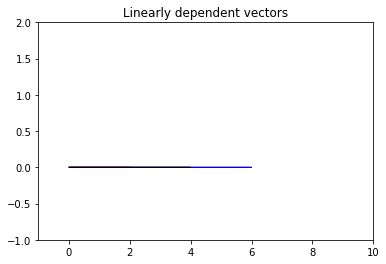

In [31]:
dependent_x=[2,0]
scaler=np.multiply(3,dependent_x)
sca_2=np.multiply(2,dependent_x)
plt.arrow(0,0,dependent_x[0],dependent_x[1], color='red')
plt.arrow(0,0, scaler[0],scaler[1], color='blue')
plt.arrow(0,0,sca_2[0],sca_2[1], color='black')
plt.xlim(-1,10)
plt.ylim(-1,2)
plt.title('Linearly dependent vectors')
plt.show()

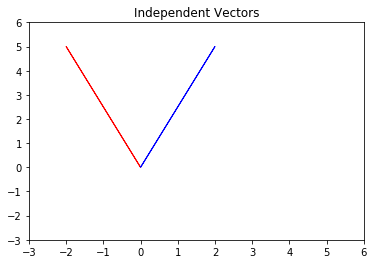

In [32]:
independent_vec=[-2, 5]
independent_vec2=[2,5]

plt.arrow(0,0,independent_vec[0],independent_vec[1], color='red')
plt.arrow(0,0,independent_vec2[0],independent_vec2[1],color='blue')
plt.xlim(-3,6)
plt.ylim(-3,6)
plt.title('Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g=np.array([[1,2]])
h=np.array([[4,8]])
 #these are dependent variables there is no span
 #h=4g


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l=np.array([[1,2,3]])
m=np.array([[-1,0,7]])
n=np.array([[4,8,2]])

#The span of this is 3 Dimensions

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



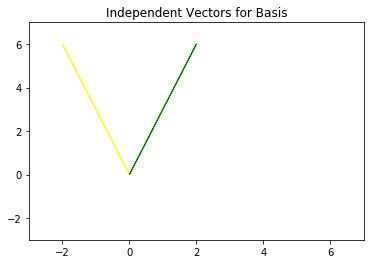

In [35]:
vec=[-2, 6]
vec2=[2,6]

plt.arrow(0,0,vec[0],vec[1], color='yellow')
plt.arrow(0,0,vec2[0],vec2[1],color='green')
plt.xlim(-3,7)
plt.ylim(-3,7)
plt.title('Independent Vectors for Basis')
plt.show()

## 6.2 What does it mean to form a basis?

A Basis if formed in V of independent vectors

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

The rank of P is 3.

\begin{align}
 P = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & -1.5 \\
  0 & 0 & 10 
 \end{bmatrix}
\end{align}

above is the row-echelon form of the matrix, and the bottom row vectors are not redundant, giving a rank of 3.


## 7.2 What does the rank of a matrix tell us?

How many indpenent vectors are within the matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

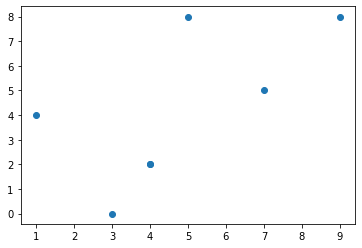

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()